In [128]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# What is Simple Linear Regression ? 
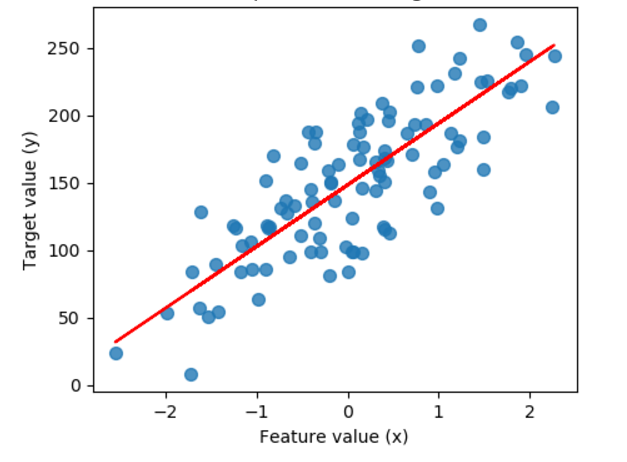

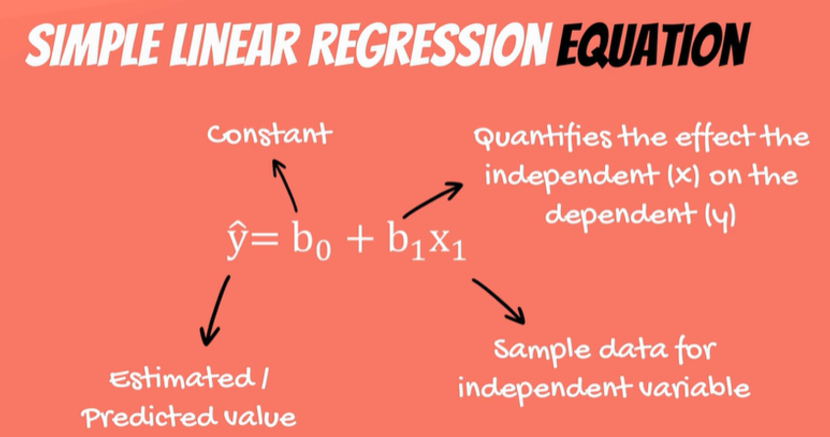


Simple Linear Regression 
we want to predict the value of y provided we have the value of x 
but to have  a regression y must depend on x in some causal way
whenever there is a change in x this change must be translate in y


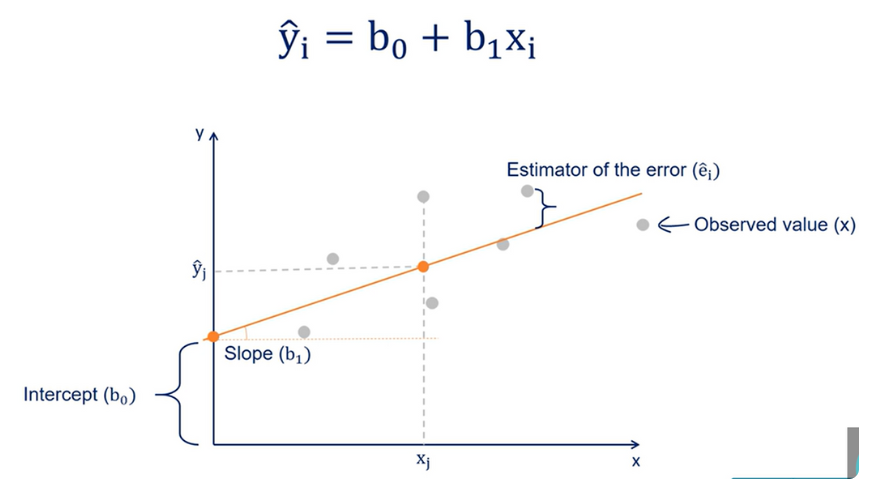

# Multiple Linear Regression ! 

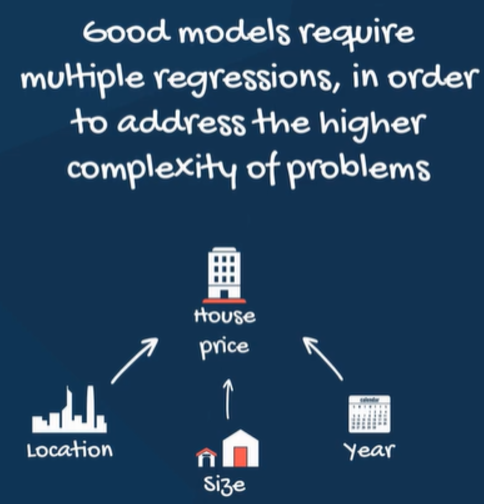

## Adding more Features to the simple Eq.
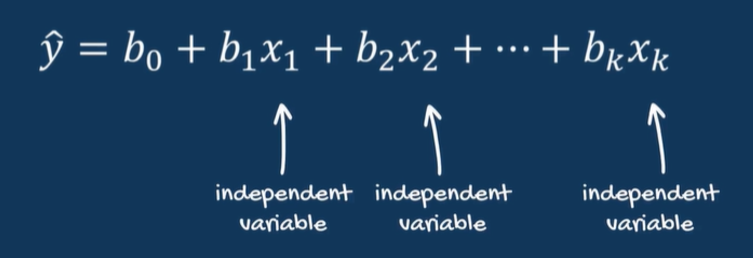

# Generate regression dataset

In [129]:

X, y = make_regression(n_samples=1000, n_features=3, noise=0.1)

### Convert X and y into a DataFrame for better visualization

In [130]:
df=pd.DataFrame(X,columns=['Feature 1','Feature 2','Feature 3'])

df['Target']=y

df.shape

(1000, 4)

#  Display the first few rows of the dataset

In [131]:
print("Dataset preview : ")

print(df.head())

Dataset preview : 
   Feature 1  Feature 2  Feature 3     Target
0  -0.566603  -1.003266   1.697346 -31.156452
1  -0.013451   0.815472  -0.374126  56.324754
2  -0.268373  -0.169758   0.764497  10.518466
3  -1.214401   0.870962  -1.139008   9.027033
4   0.826126  -0.057757   0.666355  36.519794


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  1000 non-null   float64
 1   Feature 2  1000 non-null   float64
 2   Feature 3  1000 non-null   float64
 3   Target     1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


In [133]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Feature 1,1000.0,-0.044293,0.969479,-3.116857,-0.740490,-0.060213,0.598220,2.929096
Feature 2,1000.0,-0.006885,0.945057,-2.994613,-0.668900,0.013494,0.656260,2.680571
Feature 3,1000.0,-0.034776,0.993495,-3.046143,-0.726452,-0.034886,0.600068,3.170975
Target,1000.0,-2.798310,93.727893,-261.623250,-64.960928,-0.876966,58.930744,315.982313


## Splitting the Data 

In [134]:
# # Train-test split
# split_ratio = 0.8
# split_index = int(split_ratio * X.shape[0])

# X_train, X_test = X[:split_index], X[split_index:]
# Y_train, Y_test = y[:split_index], y[split_index:]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(800, 3)
(200, 3)
(800,)
(200,)


In [136]:
#The method .reshape(-1, 1) is used to convert a 1D array (of shape (n_samples,))
#into a 2D array (of shape (n_samples, 1))

y_train = y_train.reshape(-1, 1)

y_test = y_test.reshape(-1, 1)

print(y_train.shape)
print(y_test.shape)

(800, 1)
(200, 1)


#### Imagine we know just the x values and we want to predict the y values. What are the unknowns?



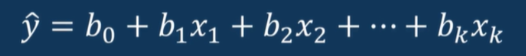



#### You can see from the formula that we need to find each Xi coeffient (weights) and b0(intercpt).

In [137]:
X_train.shape[0]#rows

800

In [138]:
X_train.shape[1]#columns

3

In [139]:
X_train

array([[-0.03299648, -1.56201434,  0.24561643],
       [-1.76853845,  0.35548179,  0.35629282],
       [ 1.06458514, -0.93788023, -0.36159928],
       ...,
       [-0.36918184, -0.23937918,  1.33652795],
       [ 0.15670386,  0.5785215 , -0.36469354],
       [-1.5308035 ,  0.20669051, -0.03331928]])

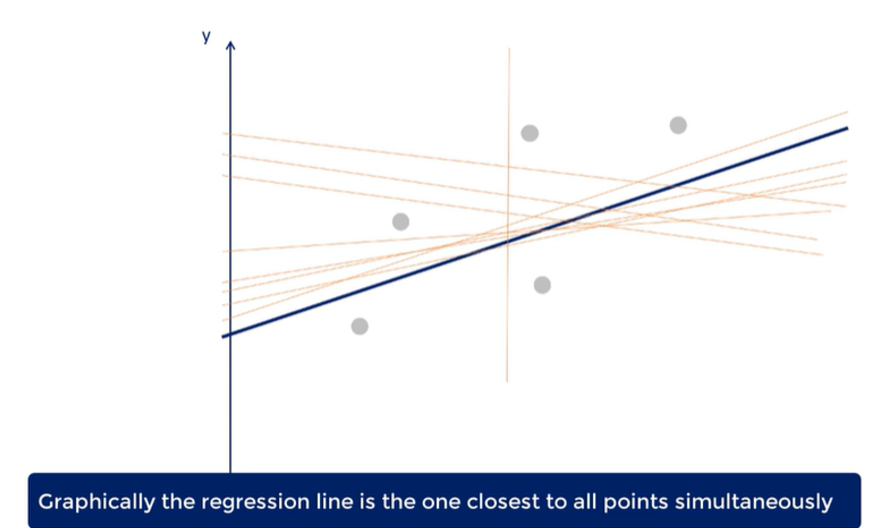

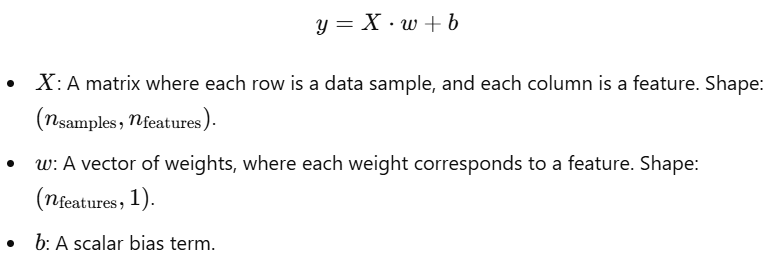

In [140]:
# np.random.rand() -> generates random numbers.
np.random.seed(0)
weights =np.random.randn(X_train.shape[1],1)
# making Random weights for each feature (one weight per feature)
b = np.random.randn(1)  # Bias
print(weights)
print("Bias: ",b)

[[1.76405235]
 [0.40015721]
 [0.97873798]]
Bias:  [2.2408932]


#### After randomly initializing weights and intercept how to modify their values to get the best fitting line or plane in 3D or more that we cant visualize ? 

## Loss Function(Mean Squared Error (MSE))


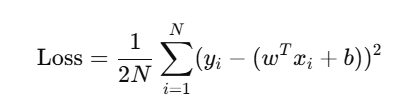
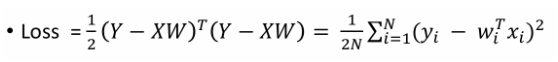
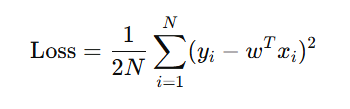

# Gradient Descent 
minimize the loss by adjusting W and b
we will get the partial derivative of the loss function 
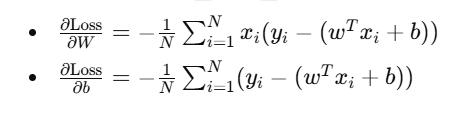

#### we will use those derivatives to update the weights each iteration 

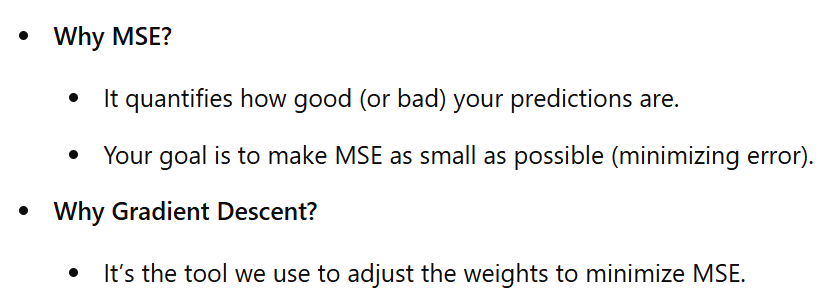

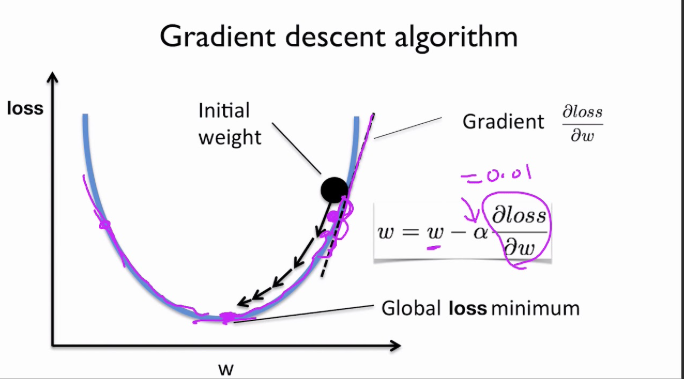

# What is Alpha ?
 Learning rate or the Step that i will take 

 
 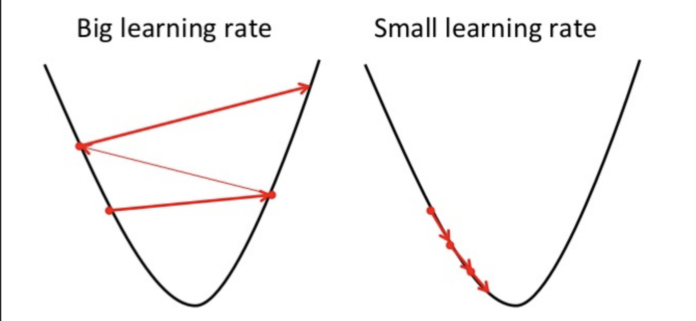

In [141]:
learning_rate = 0.1

iterations = 100

In [142]:
def compute_loss(X, Y, W, b):
    N = X.shape[0]
    predictions = X.dot(W) + b 
    # Predicted values shape (N x 1)
    loss = (1 / (2 * N)) * np.sum((Y - predictions) ** 2)
    return loss

In [143]:
def gradient_descent (X, y ,weights,b,learning_rate,iterations):
    m = X.shape[0] # number of observation 
    for i in range(iterations):
        # calculate the prediction 
        predictions = X.dot(weights)+b

        # diffrentiate loss function with respect to w & b
        dw = -(1/m)*X.T.dot(y-predictions)
        db = -(1/m)*np.sum(y-predictions)

        # updating the w and b
        weights -=learning_rate*dw
        b -=learning_rate*db

        # printing loss every 10 interations 
        if i%10 ==0:
            loss = compute_loss(X,y,weights,b)
            print (f"iteration #:{i}, Loss: {loss}")

    return weights, b

## Training the Model 

In [144]:
# get W and b values after optimization 
w_final, b_final = gradient_descent(X_train, y_train,weights,
                                    b,learning_rate, iterations)
print("Weights and y-intercpt of the best fitting funtion")
print(w_final,'\n', b_final)

iteration #:0, Loss: 3566.8916760538063
iteration #:10, Loss: 518.884428257339
iteration #:20, Loss: 76.26277705636598
iteration #:30, Loss: 11.314271979456022
iteration #:40, Loss: 1.6956669019555273
iteration #:50, Loss: 0.2594615787509217
iteration #:60, Loss: 0.04343617490470995
iteration #:70, Loss: 0.010727689087833048
iteration #:80, Loss: 0.0057455101411181845
iteration #:90, Loss: 0.004982446832131453
Weights and y-intercpt of the best fitting funtion
[[18.29435598]
 [87.78724505]
 [39.69669306]] 
 [-0.00340168]


In [145]:
def compute_mse(Y_true, Y_pred):
    return np.mean((Y_true - Y_pred) ** 2)

def compute_mae(Y_true, Y_pred):
    return np.mean(np.abs(Y_true - Y_pred))

# Make predictions on the test set
y_test_pred = X_test.dot(w_final) + b_final

# Calculate MSE and MAE for the test set
mse = compute_mse(y_test, y_test_pred)
mae = compute_mae(y_test, y_test_pred)

print(f"Test MSE: {mse}")
print(f"Test MAE: {mae}")


Test MSE: 0.009946416561057138
Test MAE: 0.07906873083408157


# comparing it with built in 


In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Fit LinearRegression on training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate MSE/MAE
y_test_pred_sklearn = model.predict(X_test)
mse_sklearn = mean_squared_error(y_test, y_test_pred_sklearn)
mae_sklearn = mean_absolute_error(y_test, y_test_pred_sklearn)

print(f"Sklearn Test MSE: {mse_sklearn}")
print(f"Sklearn Test MAE: {mae_sklearn}")


Sklearn Test MSE: 0.009916960607687667
Sklearn Test MAE: 0.07851707932523481
